In [1]:
# input: datamatrix as loaded by numpy.loadtxt('dataset.txt')
# output:  1) the eigenvalues in a vector (numpy array) in descending order
#          2) the unit eigenvectors in a matrix (numpy array) with each column being an eigenvector (in the same order as its associated eigenvalue)
#
# note: make sure the order of the eigenvalues (the projected variance) is decreasing, and the eigenvectors have the same order as their associated eigenvalues

In [2]:
#Exercise 1
import numpy as np
import matplotlib.pyplot as plt

def pca(data):
    '''Return an array of eigen vectors and eigenvalues for a long dataset'''
    cov_matrix = np.cov(data.T) # transpose to get the correct covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) # calculate eigen stuff
    eigenvalues = eigenvalues[::-1] # reverse sort array
    eigenvectors = eigenvectors[:,::-1] # reverse sort matrix
    return eigenvectors, eigenvalues

def standardize_data(data):
    '''Transforms the data so that mean = 0 and sd = 1'''
    mean = np.mean(data, axis = 0)
    sd = np.std(data, axis = 0)
    data = (data - mean)/sd
    return data

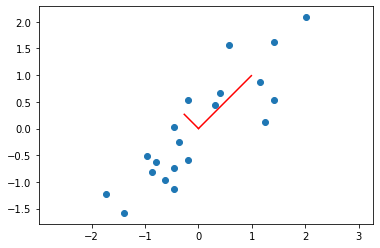

In [3]:
#Exercise 2
murder = np.loadtxt("murderdata2d.txt")
murder = standardize_data(murder)
eigenvectors, eigenvalues = pca(murder)

#calculate Standard Deviation
sd_x = np.sqrt(eigenvalues[0])
sd_y = np.sqrt(eigenvalues[1])

#Plot figure
plt.scatter(murder[:,0], murder[:,1])
plt.axis('equal')
plt.plot([0, sd_x*eigenvectors[0,0]], [0, sd_x*eigenvectors[1,0]], "red")
plt.plot([0, sd_y*eigenvectors[0,1]], [0, sd_y*eigenvectors[1,1]], "red")
plt.savefig("figure1.png")

4 PCs are needed to capture 90.0% of the variance
5 PCs are needed to capture 95.0% of the variance


'ADD TITLE AND SHIT'

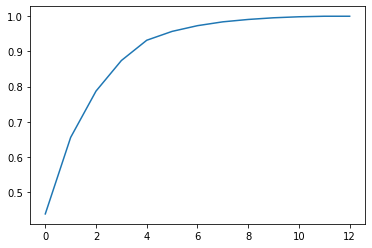

In [4]:
#Exercise 3
def min_dimensions(N, cum_variance):
    value = cum_variance[cum_variance > N][0] # get the first value which is bigger than N
    ind = np.where(cum_variance == value)[0][0] # return the index of that value
    print(f"{ind} PCs are needed to capture {N*100}% of the variance")
    return ind

'''NOT SURE IF I SHOULD ADD TEST DATA'''
pesticide = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
#dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter = ',')
pesticide = pesticide[:,:-1]
pesticide = standardize_data(pesticide)
eigenvectors, eigenvalues = pca(pesticide)
cum_variance = np.cumsum(eigenvalues/sum(eigenvalues))

min_dimensions(0.9, cum_variance)
min_dimensions(0.95, cum_variance)

plt.plot(cum_variance)
'''ADD TITLE AND SHIT'''

In [226]:
# input:   1) datamatrix as loaded by numpy.loadtxt('dataset.txt')
#	   2) an integer d specifying the number of dimensions for the output (most commonly used are 2 or 3)
# output:  1) an N x d numpy array containing the d coordinates of the N original datapoints projected onto the top d PCs
#

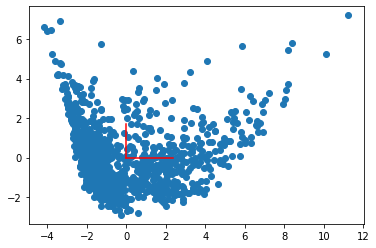

In [5]:
def mds(data, d):
    eigenvectors, eigenvalues = pca(data) # calculate eigenvectors
    eigenvectors = eigenvectors[:, :d] # select first d eigenvectors
    data = eigenvectors.T @ data.T # transpose EV to d*D matrix, transpose data to D*N matrix, get d*N matrix
    data = data.T #transpose to N*d matrix
    return data


pesticide = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
pesticide = pesticide[:,:-1]
pesticide = standardize_data(pesticide)
eigenvectors, eigenvalues = pca(pesticide)

transformed_pesticide = mds(pesticide, 2)

sd_x = np.sqrt(eigenvalues[0])
sd_y = np.sqrt(eigenvalues[1])

Q = eigenvectors.T @ eigenvectors

plt.scatter(transformed_pesticide[:,0], transformed_pesticide[:,1])
plt.axis('equal')
plt.plot([0, sd_x * Q[0,0]], [0, sd_x * Q[0,1]], "red")
plt.plot([0, sd_y * Q[1,0]], [0, sd_y * Q[1,1]], "red")

plt.savefig("figure3.png")

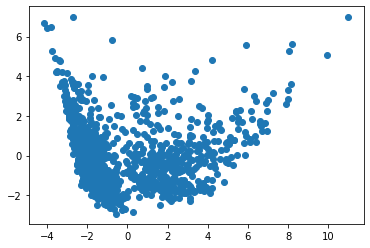

In [314]:
transformed_data = eigenvectors[:, :2].T @ pesticide.T
transformed_data = transformed_data.T
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.savefig("figure3.png")

In [312]:
eigenvectors[:, :2]
np.shape(eigenvectors[:, :2])

(14, 2)

In [6]:
#Exercise 3
def initialize_kmeans(k, data):
    '''Create a list of k centroids (the first k values of the dataset)'''
    means = []
    for i in range(k):
        means.append(data[i])
    return means

def get_loss(means, data):
    '''Takes in a list of centroids and the data and returns the loss'''
    loss = 0
    for i in means:
        loss += np.linalg.norm(data - i)**2
    return loss

def get_newmean(means, data):
    '''Takes in a list of centroids and the data and returns a new list of centroids'''
    k = len(means)
    new_means = []
    distance_matrix = []
    for i in range(k): # create a matrix of distances from the centroid for each centroid
        distance = np.linalg.norm(data - means[i], axis = 1)
        distance_matrix.append(distance)
    distance_matrix = np.array(distance_matrix).T # Transpose so that the row number of the dist matrix matches the data row
    index = np.argmin(distance_matrix, axis = 1) # Find the closest centroid
    for i in range(k):
        cluster = data[np.where(index == i)] # Subset the data for each cluster
        new_mean = np.mean(cluster, axis = 0) # calculate the mean of each cluster
        new_means.append(new_mean)
    return new_means

def kmean(k, data):
    '''Calculate k mean clusters for the data'''
    means = initialize_kmeans(k, data)
    old_loss = get_loss(means, data)
    
    while True:
        means = get_newmean(means, data)
        new_loss = get_loss(means, data)
        if new_loss == old_loss:
            return means
            break
        else:
            old_loss = new_loss

centroids = kmean(2, pesticide)
print(f"Centroid 1: {centroids[0]}")
print(f"Centroid 2: {centroids[1]}")

Centroid 1: [ 0.10697804  0.15743643  0.24443175  0.42630232  0.36461238 -0.28733807
 -0.48392646 -0.52535925 -0.49566457 -0.43337993 -0.37703005 -0.26288248
 -0.17762998]
Centroid 2: [-0.26064409 -0.38358222 -0.59553991 -1.03865412 -0.88835112  0.70007797
  1.17905107  1.27999901  1.20765011  1.05589819  0.91860586  0.64049373
  0.43278231]


In [552]:
kmean(3, pesticide)

[array([-0.27491306, -0.38774648, -0.41258411,  0.04851863,  0.82398739,
         0.10729113, -0.35554812, -0.46721117, -0.45901182, -0.41344101,
        -0.37529455, -0.27996989, -0.19323979]),
 array([-0.27461289, -0.3915838 , -0.59704586, -1.0587511 , -0.96515428,
         0.69729992,  1.2318829 ,  1.3440747 ,  1.26549428,  1.11305548,
         0.99052774,  0.7118722 ,  0.47969704]),
 array([ 0.79447339,  1.12501118,  1.38587628,  1.01870123, -0.50950787,
        -0.92774192, -0.6336447 , -0.54512841, -0.4780014 , -0.40249372,
        -0.34460056, -0.22874666, -0.14569201])]